# An ant in the rain:

Suppose that raindrops fall as a Poisson process with mean intensity $\lambda$
on a big patio.
Each raindrop splatters to a random Exponentially distributed radius with mean $\rho$, independently.

1. What's the proportion of the patio that isn't wet after $T$ minutes?
2. What's the probability that        an ant running on the patio doesn't get wet?

## First, the math:

Let $(x_i, y_i, t_i, r_i)$ be the coordinates ($x, y$), time ($t$), and radius ($r$) of the $i$th raindrop,
where $(x_i, y_i) \in A$, and $A$ is the patio.
By Poisson labeling, we can think of this as a PPP
on $A \times [0, \infty] \times [0, \infty)$ with mean intensity
$\mu(dx, dy, dt, dr) = \lambda dx dy dt \frac{e^{-r/\rho}}{\rho} dr$.

A     given point $(u,v)$ is not hit by a raindrop in the time span $[0, t]$
iff there are *no* raindrops in the set
$$
 Z = \{ (x, y, t, r) : 0 \le t \le T \; \text{and}\; (u-x)^2 + (v-y)^2 \le r \}
$$

The probability that there's *no* points in a PPP in (any) set $Z$ is just
the negative exponential of the expected number of points in that set:
$$
\mathbb{P}\{N(Z) = 0\}
=
\exp\left(-\mathbb{E}[N(Z)]\right)
$$
(since the probability that a Poisson with mean $x$ is zero is $\exp(-x)$).

So, we just need to compute this.
First, let's ignore edge effects, and take $(u, v) = (0,0)$. Then, this is
$$\begin{aligned}
  \mathbb{E}[N(Z)]
  &= \int_Z \mu(dx dy dt dr) \\
  &=
  \int_0^T \int_0^\infty \int_{|x^2 + y^2| \le r} \lambda dx dy \frac{e^{-r/\rho}}{\rho} dr dt \\
  &=
  \int_0^T \int_0^\infty \lambda \pi r^2 \frac{e^{-r/\rho}}{\rho} dr dt \\
  &=
  T \int_0^\infty \lambda \pi r^2 \frac{e^{-r/\rho}}{\rho} dr \\
  &=
  2 T \lambda \pi \rho^2 \\
\end{aligned}$$


In [7]:
# quick check on that last integral:
# \int_0^\infty r^2 \exp(-r/\rho) / \rho dr should be the second moment of an Exponential with mean rho:
import numpy as np
rho = 0.3
rng = np.random.default_rng()
x = rng.exponential(scale=rho, size=int(1e6))
np.mean(x**2), 2 * rho**2  # close!!

(0.18111428298624177, 0.18)

So, the answer to (a) should be
$$
\exp(-2 T \lambda \pi \rho^2) ,
$$
minus an inconsequential amount for edge effects.

In [11]:
# for example
T = 120 # minutes
rho = .005 # m
lam = 50
np.exp(- 2 * T * lam * np.pi * rho **2)

0.3896611373753468

## Simulation

In [49]:
T = 120
rho = 0.005
lam = 50
W, L = (0.2, 0.1) # width and length in m of the patio

# total number of drops on the patio
N = rng.poisson(T * lam * W * L)
print(f"There are {N} drops in total.")

There are 133 drops in total.


In [50]:
x = rng.uniform(low=0, high=W, size=N)
y = rng.uniform(low=0, high=L, size=N)
t = rng.uniform(low=0, high=T, size=N)
r = rng.exponential(scale=rho, size=N)

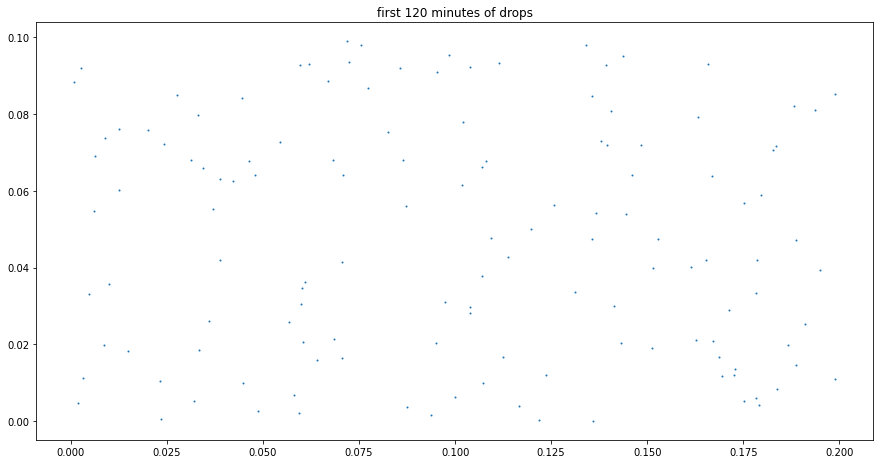

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect(1)

max_t = T
do_these = (t < T)
ax.scatter(x[do_these], y[do_these], s=1)
ax.set_title(f"first {max_t} minutes of drops");

In [55]:
def make_circle(x, y, r):
    tt = np.linspace(0, 2 * np.pi, 101)
    u = x + r * np.cos(tt)
    v = y + r * np.sin(tt)
    return u, v

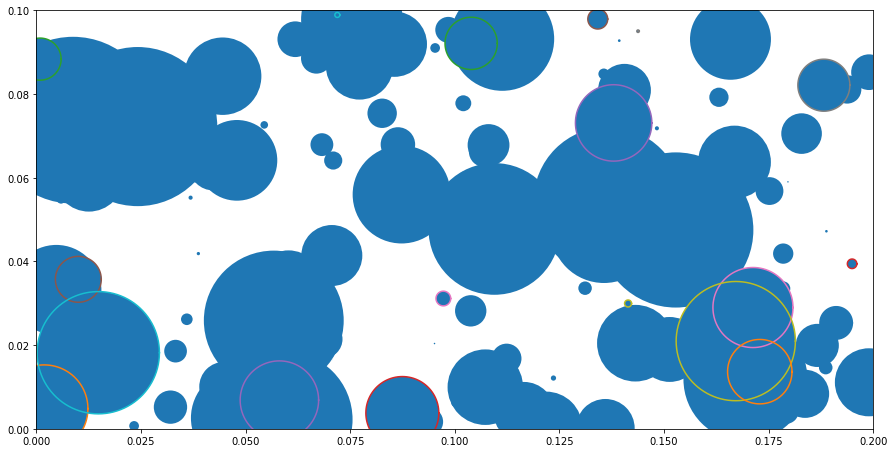

In [57]:
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

circles = PatchCollection([
    Circle((xi, yi), ri)
    for xi, yi, ri, ti in zip(x, y, r, t) if ti < max_t
])

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim(0, W)
ax.set_ylim(0, L)
ax.set_aspect(1)
ax.add_collection(circles)

for j in range(20):
    u, v = make_circle(x[j], y[j], r[j])
    ax.plot(u, v)

## What about the ant?

The answer to (b) is the same as (a)!
Why?
The answer is the same as above, but with a different set $Z$;
however, this new set has the same area as $Z$.